## matplotlib.pyplot.bar

#### 기본적인 형태
- matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, ***kwargs

#### 1. Grouped bar chart with labels

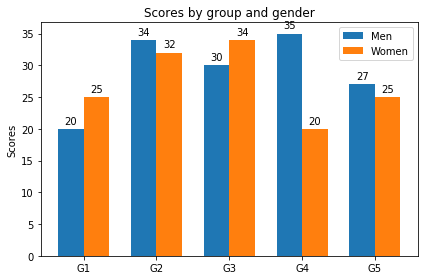

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2, men_means, width, label='Men')
rects2 = ax.bar(x+width/2, women_means, width, label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width()/2, height),
                   xytext=(0,3),
                   textcoords="offset points",
                   ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

### ax.annotate(matplotlib.axes.Axes.annotate)
#### 기본적인 형태
- Axes.annotate(self, text(:str), xy=(float, float), *args, ***kwargs)

#### 2. Percentiles as horizontal bar chart

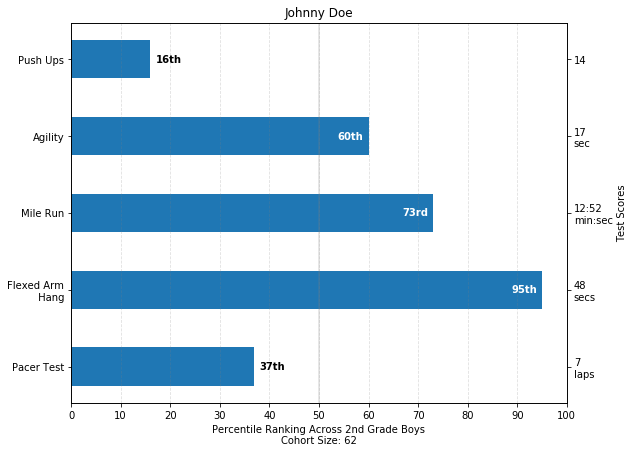

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

np.random.seed(42)

Student = namedtuple('Student', ['name', 'grade', 'gender'])
Score = namedtuple('Score', ['score', 'percentile'])

test_names = ['Pacer Test', 'Flexed Arm\n Hang', 'Mile Run', 'Agility', 'Push Ups']
test_units = dict(zip(test_names, ['laps', 'secs', 'min:sec', 'sec', '']))

def attach_ordinal(num):
    suffixes = {str(i): v
               for i, v in enumerate(['th', 'st', 'nd', 'rd', 'th', 'th', 'th', 'th', 'th', 'th'])}
    v = str(num)
    if v in {'11', '12', '13'}:
        return v + 'th'
    return v + suffixes[v[-1]]

def format_score(score, test):
    unit = test_units[test]
    if unit:
        return f'{score}\n{unit}'
    else:
        return score

def format_ycursor(y):
    y = int(y)
    if y<0 or y>=len(test_names):
        return ''
    else:
        return test_names[y]

def plot_student_results(student, scores, cohort_size):
    fig, ax1 = plt.subplots(figsize=(9, 7)) 
    fig.subplots_adjust(left=0.115, right=0.88)
    fig.canvas.set_window_title('Eldorado K-8 Fitness Chart')

    pos = np.arange(len(test_names))

    rects = ax1.barh(pos, [scores[k].percentile for k in test_names],
                     align='center',
                     height=0.5,
                     tick_label=test_names)

    ax1.set_title(student.name)

    ax1.set_xlim([0, 100])
    ax1.xaxis.set_major_locator(MaxNLocator(11))
    ax1.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)
    ax1.axvline(50, color='grey', alpha=0.25)
    ax2 = ax1.twinx()
    ax2.set_yticks(pos)
    ax2.set_ylim(ax1.get_ylim())
    ax2.set_yticklabels([format_score(scores[k].score, k) for k in test_names])
    ax2.set_ylabel('Test Scores')
    xlabel = ('Percentile Ranking Across {grade} Grade {gender}s\n'
              'Cohort Size: {cohort_size}')
    ax1.set_xlabel(xlabel.format(grade=attach_ordinal(student.grade),
                                 gender=student.gender.title(),
                                 cohort_size=cohort_size))
    rect_labels = []
    for rect in rects:
        width = int(rect.get_width())
        rank_str = attach_ordinal(width)
        if width < 40:
            xloc = 5
            clr = 'black'
            align = 'left'
        else:
            xloc = -5
            clr = 'white'
            align = 'right'
            
        yloc = rect.get_y() + rect.get_height() / 2
        label = ax1.annotate(
            rank_str, xy=(width, yloc), xytext=(xloc, 0),
            textcoords="offset points",
            horizontalalignment=align, verticalalignment='center',
            color=clr, weight='bold', clip_on=True)
        rect_labels.append(label)

    ax2.fmt_ydata = format_ycursor
    return {'fig': fig,
            'ax': ax1,
            'ax_right': ax2,
            'bars': rects,
            'perc_labels': rect_labels}


student = Student('Johnny Doe', 2, 'boy')
scores = dict(zip(
    test_names,
    (Score(v, p) for v, p in
     zip(['7', '48', '12:52', '17', '14'],
         np.round(np.random.uniform(0, 100, len(test_names)), 0)))))
cohort_size = 62  

arts = plot_student_results(student, scores, cohort_size)
plt.show()